In [4]:
#https://api.coin.z.com/docs/#public-api
#最新レート取得
alt_coin = str(input("通過を選んでください"))
#空欄なら初期値に XRP設定
if alt_coin == "":
    alt_coint = "XRP"

通過を選んでください XRP


In [5]:
#過去データ取得
import requests
import pandas as pd
import pprint
import json
import datetime
import numpy as np
import matplotlib.pyplot as plt

#1min 5min 10min 15min 30min 1hour 
#4hour 8hour 12hour 1day 1week 1month

#現在時刻取得
now = datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=9))) # 日本時刻
today = now.strftime('%Y%m%d')
thisYear = now.strftime('%Y')
now = now + datetime.timedelta(days=-1)
yesterday = now.strftime('%Y%m%d')

#KLine情報の取得 （当日）
params = {'symbol': alt_coin, 'interval': '1min', 'date':today}
response = requests.get('https://api.coin.z.com/public/v1/klines', params=params)
#JSONからDataFrame作成
json_obj = response.json()
json_obj = json_obj['data']
hist_data = pd.json_normalize(data=json_obj)

#昨日データ
params = {'symbol': alt_coin, 'interval': '1min', 'date':yesterday}
response = requests.get('https://api.coin.z.com/public/v1/klines', params=params)
#JSONからDataFrame作成
json_obj = response.json()
print(json_obj)
json_obj = json_obj['data']
hist_data = hist_data.append(pd.json_normalize(data=json_obj))

#UnixTimeStamp変換
hist_data['openTime'] = pd.to_datetime(hist_data['openTime'], unit='ms')
hist_data = hist_data[['openTime', 'close']]

hist_data = hist_data.assign(
    alt_coin = alt_coin
)
hist_data = hist_data.sort_values('openTime')
#display(hist_data)

#Indexで最新20件を取得
latest_df = hist_data.copy()
sigma =2
duration = 10 #XX分ごとの移動平均と標準偏差を取得

#移動平均と標準偏差
#10分前までの偏差
latest_df["10_SMA"] = latest_df["close"].rolling(window=10).mean() #移動平均
latest_df["10_std"] = latest_df["close"].rolling(window=10).std() #標準偏差
latest_df["10_limit"] = latest_df["10_SMA"]-sigma*latest_df["10_std"]

latest_df["30_SMA"] = latest_df["close"].rolling(window=30).mean() #移動平均
latest_df["30_std"] = latest_df["close"].rolling(window=30).std() #標準偏差
latest_df["30_limit"] = latest_df["30_SMA"]-sigma*latest_df["30_std"]

latest_df["60_SMA"] = latest_df["close"].rolling(window=60).mean() #移動平均
latest_df["60_std"] = latest_df["close"].rolling(window=60).std() #標準偏差
latest_df["60_limit"] = latest_df["60_SMA"]-sigma*latest_df["60_std"]

#不要行を削除
latest_df = latest_df.drop(columns='10_std')
latest_df = latest_df.drop(columns='30_std')
latest_df = latest_df.drop(columns='60_std')


#最新行を取得
max_idx = (len(latest_df) - 1)
latest_df_max = latest_df.iloc[max_idx]
#小数点、第2桁まで表示
ten_min_pred = latest_df_max['10_limit']
ten_min_pred = '{:.2f}'.format(ten_min_pred)

thirty_min_pred = latest_df_max['30_limit']
thirty_min_pred = '{:.2f}'.format(thirty_min_pred)

hour_pred = latest_df_max['60_limit']
hour_pred = '{:.2f}'.format(hour_pred)

result = "10m:" + ten_min_pred + "/" + "30m:" + thirty_min_pred + "/" + "1h:" + hour_pred

pd.set_option('display.max_rows', 10)
latest_df = latest_df.drop(range(0,60))
#latest_df['openTime'] = latest_df['openTime'].dt.round("100T")

display(latest_df)
display(latest_df.dtypes)

{'status': 0, 'data': [{'openTime': '1621890000000', 'open': '101', 'high': '101.317', 'low': '100.985', 'close': '101.177', 'volume': '2085'}, {'openTime': '1621890060000', 'open': '100.8', 'high': '100.8', 'low': '100.8', 'close': '100.8', 'volume': '1165'}, {'openTime': '1621890120000', 'open': '100.782', 'high': '101.198', 'low': '100.475', 'close': '101.198', 'volume': '4500'}, {'openTime': '1621890180000', 'open': '100.8', 'high': '101.16', 'low': '100.601', 'close': '100.818', 'volume': '2089'}, {'openTime': '1621890240000', 'open': '101.17', 'high': '101.2', 'low': '101.17', 'close': '101.2', 'volume': '100'}, {'openTime': '1621890300000', 'open': '101.159', 'high': '101.2', 'low': '101.159', 'close': '101.2', 'volume': '3200'}, {'openTime': '1621890360000', 'open': '101.2', 'high': '101.384', 'low': '101.2', 'close': '101.384', 'volume': '3058'}, {'openTime': '1621890420000', 'open': '101.384', 'high': '101.384', 'low': '101.384', 'close': '101.384', 'volume': '3101'}, {'openT

,openTime,close,alt_coin,10_SMA,10_limit,30_SMA,30_limit,60_SMA,60_limit
60,2021-05-24 22:00:00,100.5,XRP,100.4739,99.776352,100.916800,99.534151,101.368217,99.818278
61,2021-05-24 22:01:00,101.125,XRP,100.5263,99.716606,100.901100,99.539833,101.373633,99.829512
62,2021-05-24 22:02:00,101.104,XRP,100.5867,99.699338,100.887500,99.543445,101.372067,99.827030
63,2021-05-24 22:03:00,101.281,XRP,100.6548,99.664363,100.887867,99.543374,101.379783,99.841393
64,2021-05-24 22:04:00,100.997,XRP,100.6519,99.666134,100.870533,99.546348,101.376400,99.835510
...,...,...,...,...,...,...,...,...,...
515,2021-05-26 05:55:00,111.76,XRP,112.0000,111.464193,112.559167,111.452182,112.164300,110.216066
516,2021-05-26 05:56:00,111.578,XRP,111.9179,111.402610,112.528433,111.364900,112.190067,110.317110
517,2021-05-26 05:57:00,111.216,XRP,111.8617,111.182179,112.478567,111.222997,112.210333,110.408822
518,2021-05-26 05:58:00,110.848,XRP,111.7265,110.839736,112.411867,111.031344,112.220300,110.456687


openTime    datetime64[ns]
close               object
alt_coin            object
10_SMA             float64
10_limit           float64
30_SMA             float64
30_limit           float64
60_SMA             float64
60_limit           float64
dtype: object

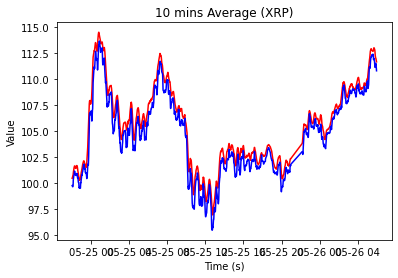

In [6]:
import matplotlib.pyplot as plt
plt.plot(latest_df['openTime'], latest_df['10_SMA'], color = 'red') # 折れ線グラフをプロット
plt.plot(latest_df['openTime'], latest_df['10_limit'], color = 'blue') # 折れ線グラフをプロット

plt.title('10 mins Average' + ' (' + alt_coin + ')')          # 図のタイトル
plt.xlabel('Time (s)')                            # x軸のラベル
plt.ylabel('Value')                               # y軸のラベル

plt.show()                                        # 図の表示